In [88]:
%matplotlib inline
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

In [70]:
LE = pd.read_csv('data/Life Expectancy Data 2.csv')

FileNotFoundError: File b'data/Life Expectancy Data 2.csv' does not exist

In [8]:
LE = LE.rename(columns={'Life expectancy (Clio-Infra up to 1949; UN Population Division for 1950 to 2015)':'Life_Expectancy','Entity':'Country'})


In [29]:
LE = LE.loc[LE.Country=="United States"].drop('Code', axis=1)

ValueError: labels ['Code'] not contained in axis

In [30]:
LE = LE.drop('Country',axis=1)

In [32]:
LE.to_csv("US_LongTermLE.csv", index=False)

In [76]:
US = pd.read_csv('US_LongTermLE.csv')

In [37]:
US.tail()

Year  Life_Expectancy
112  2011        78.681999
113  2012        78.820999
114  2013        78.959999
115  2014        79.099998
116  2015        79.244003

In [59]:
year = [i for i in range(2016,2501,1)]
le = [(0.2713566 * i - 464.42092776) for i in year]
d = {'Year':year,
    'Life_Expectancy':le}
pred = pd.DataFrame(d)


     Life_Expectancy  Year
480       212.885146  2496
481       213.156502  2497
482       213.427859  2498
483       213.699216  2499
484       213.970572  2500


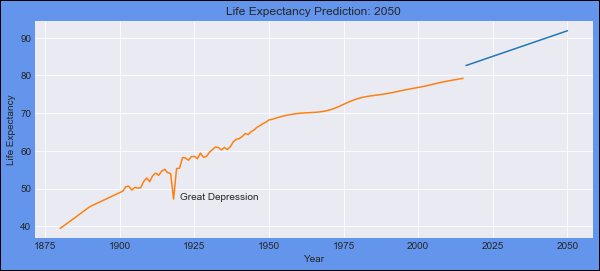

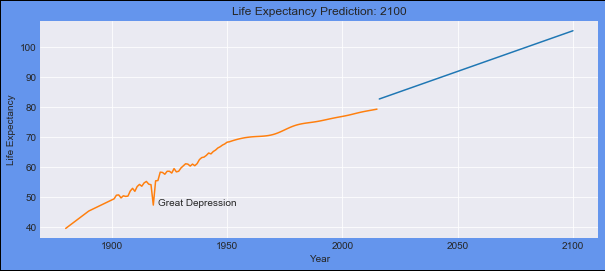

In [155]:
for date in [2050,2100]:
    sns.set_style('darkgrid')
    fig = plt.figure(figsize=(10,4),edgecolor='black',facecolor='cornflowerblue',linewidth=1.5)
    pred2050 = pred.loc[pred.Year <=date]
    plt.plot(pred2050.Year,pred2050.Life_Expectancy)
    plt.plot(LE.Year,LE.Life_Expectancy)
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy')
    plt.title(f'Life Expectancy Prediction: {date}')
    plt.text(1920,47,s='Great Depression')
    plt.savefig(f'images/LE_Prediction{date}.png',facecolor=fig.get_facecolor(),edgecolor=fig.get_edgecolor())

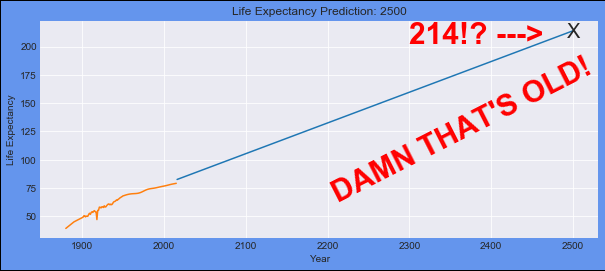

In [156]:
sns.set_style('darkgrid')
fig = plt.figure(figsize=(10,4),edgecolor='black',facecolor='cornflowerblue',linewidth=1.5)
pred2050 = pred.loc[pred.Year <=2500]
plt.plot(pred2050.Year,pred2050.Life_Expectancy)
plt.plot(LE.Year,LE.Life_Expectancy)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title(f'Life Expectancy Prediction: 2500')
plt.text(2300,203, s='214!? --->',fontsize=30, color='red', fontweight='bold')
plt.text(2200,175,s="DAMN THAT'S OLD!", color='red', fontsize=30, fontweight='bold', rotation=27)
plt.text(2492,208,s="X",fontsize=20)
plt.savefig(f'images/LE_Prediction2500.png',facecolor=fig.get_facecolor(),edgecolor=fig.get_edgecolor())

In [23]:
pred.head(100)

Code      Country  Life_Expectancy  Year
0   AFG  Afghanistan        27.537001  1950
1   AFG  Afghanistan        27.809999  1951
2   AFG  Afghanistan        28.350000  1952
3   AFG  Afghanistan        28.879999  1953
4   AFG  Afghanistan        29.399000  1954
5   AFG  Afghanistan        29.907000  1955
6   AFG  Afghanistan        30.403999  1956
7   AFG  Afghanistan        30.891001  1957
8   AFG  Afghanistan        31.367001  1958
9   AFG  Afghanistan        31.834000  1959
10  AFG  Afghanistan        32.292000  1960
11  AFG  Afghanistan        32.742001  1961
12  AFG  Afghanistan        33.185001  1962
13  AFG  Afghanistan        33.624001  1963
14  AFG  Afghanistan        34.060001  1964
15  AFG  Afghanistan        34.494999  1965
16  AFG  Afghanistan        34.928001  1966
17  AFG  Afghanistan        35.361000  1967
18  AFG  Afghanistan        35.796001  1968
19  AFG  Afghanistan        36.234001  1969
20  AFG  Afghanistan        36.678001  1970
21  AFG  Afghanistan        37.127998  1971
22  AFG  Afghanistan        37.587002  1972
23  AFG  Afghanistan        38.056000  1973
24  AFG  Afghanistan        38.540001  1974
25  AFG  Afghanistan        39.039001  1975
26  AFG  Afghanistan        39.556000  1976
27  AFG  Afghanistan        40.091999  1977
28  AFG  Afghanistan        40.650002  1978
29  AFG  Afghanistan        41.234001  1979
..  ...          ...              ...   ...
70  NaN       Africa        38.228001  1954
71  NaN       Africa        38.730000  1955
72  NaN       Africa        39.229000  1956
73  NaN       Africa        39.724998  1957
74  NaN       Africa        40.215000  1958
75  NaN       Africa        40.700001  1959
76  NaN       Africa        41.176998  1960
77  NaN       Africa        41.644001  1961
78  NaN       Africa        42.099998  1962
79  NaN       Africa        42.543999  1963
80  NaN       Africa        42.977001  1964
81  NaN       Africa        43.401001  1965
82  NaN       Africa        43.817001  1966
83  NaN       Africa        44.230000  1967
84  NaN       Africa        44.641998  1968
85  NaN       Africa        45.055000  1969
86  NaN       Africa        45.471001  1970
87  NaN       Africa        45.895000  1971
88  NaN       Africa        46.324001  1972
89  NaN       Africa        46.756001  1973
90  NaN       Africa        47.188999  1974
91  NaN       Africa        47.622002  1975
92  NaN       Africa        48.049000  1976
93  NaN       Africa        48.466999  1977
94  NaN       Africa        48.873001  1978
95  NaN       Africa        49.262001  1979
96  NaN       Africa        49.633999  1980
97  NaN       Africa        49.992001  1981
98  NaN       Africa        50.334999  1982
99  NaN       Africa        50.660000  1983

[100 rows x 4 columns]

United States
Features: Year
X-Shape: (117, 1), Y-Shape: (117, 1)
y = [[ 0.2713566]] * x + [-464.42092776]
r2: 0.9550995896166242
mse: 4.060946980158725
rmse: 2.015179143440782


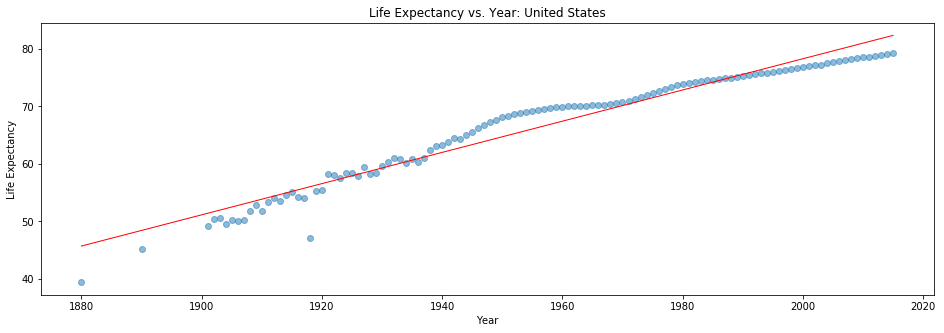

In [15]:
LE_univariate_model(LE,['Year'], country="United States")

In [10]:
x_ = LE.Year
y_ = LE.Life_Expectancy


In [20]:
log_line = np.polyfit(np.log(x_),y_,1)
y = log_line[0]*np.log(x_)+log_line[1]
print(y)


0        55.953895
1        56.136444
2        56.318899
3        56.501261
4        56.683530
5        56.865705
6        57.047787
7        57.229776
8        57.411673
9        57.593476
10       57.775186
11       57.956804
12       58.138329
13       58.319762
14       58.501102
15       58.682350
16       58.863506
17       59.044569
18       59.225541
19       59.406421
20       59.587208
21       59.767905
22       59.948509
23       60.129022
24       60.309443
25       60.489773
26       60.670012
27       60.850160
28       61.030216
29       61.210181
           ...    
17864    62.467399
17865    62.646640
17866    62.825790
17867    63.004851
17868    63.183821
17869    63.362701
17870    63.541492
17871    63.720193
17872    63.898804
17873    64.077326
17874    64.255758
17875    64.434101
17876    64.612355
17877    64.790519
17878    64.968595
17879    65.146581
17880    65.324478
17881    65.502287
17882    65.680007
17883    65.857638
17884    66.035180
17885    66.

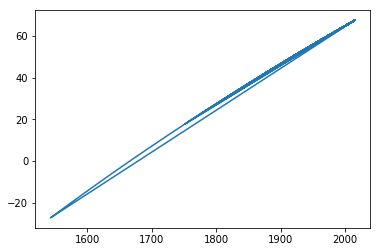

In [21]:
# plt.scatter(x_,y_)
plt.plot(x_,y)

In [89]:
# Pull in cleansed data
data = pd.read_csv('clean_data.csv')

FileNotFoundError: File b'clean_data.csv' does not exist

In [25]:

data = data[['Year','Life_Expectancy','Adult_Mortality','BMI']]

In [26]:
data.head()

Year  Life_Expectancy  Adult_Mortality   BMI
0  2015             65.0            263.0  19.1
1  2014             59.9            271.0  18.6
2  2013             59.9            268.0  18.1
3  2012             59.5            272.0  17.6
4  2011             59.2            275.0  17.2

In [12]:
def LE_univariate_model(data, features, country=None):
    '''
    Will only work with 1 value for features at the moment. 
    data must be in the form of a pandas dataframe country must be a string.
    Also requires same level directory 'images' to store figure.
    '''
    
    df = data
    
    if country == None:
        print("No country was passed")
    else:
        df = df.loc[df.Country == country]
        print(country)
        
    print(f'Features: {features[0]}')
    X = df[features].values.reshape(-1,1)
    y = df['Life_Expectancy'].values.reshape(-1,1)
    print(f'X-Shape: {X.shape}, Y-Shape: {y.shape}')
   
    
    # Initiate the model
    model = LinearRegression()
    model.fit(X,y)
    predictions = model.predict(X)
    print(f'y = {model.coef_} * x + {model.intercept_}')
    print(f'r2: {model.score(X,y)}')
    print(f'mse: {mean_squared_error(y, predictions)}')
    print(f'rmse: {sqrt(mean_squared_error(y, predictions))}')

    fig = plt.figure()
    plt.figure(figsize = (16,5))
    plt.scatter(X, y, alpha=0.5)
    plt.xlabel(features[0])
    plt.ylabel("Life Expectancy")
    plt.title(f'Life Expectancy vs. {features[0]}: {country}')
    plt.plot(X, predictions, color='red', linewidth=1)
    fig.savefig('images/img.png')
    plt.show()

In [8]:
def create_model(data, features, DV, country=None):
    '''
    DV = Dependent Variable or y_axis
    Will only work with 1 value for features at the moment. 
    data must be in the form of a pandas dataframe country must be a string.
    Also requires same level directory 'images' to store figure.
    '''
    
    df = data
    
    if country == None:
        print("No country was passed")
    else:
        df = df.loc[df.Country == country]
        print(country)
        
    print(f'Features: {features[0]}')
    X = df[features].values.reshape(-1,1)
    y = df[DV].values.reshape(-1,1)
    print(f'X-Shape: {X.shape}, Y-Shape: {y.shape}')
   
    
    # Initiate the model
    model = LinearRegression()
    model.fit(X,y)
    predictions = model.predict(X)
    print(f'y = {model.coef_[0]} * x + {model.intercept_[0]}')
    print(f'r2: {model.score(X,y)}')
    print(f'mse: {mean_squared_error(y, predictions)}')
    print(f'rmse: {sqrt(mean_squared_error(y, predictions))}')

#     plt.figure(figsize = (16,5))
    plt.scatter(X, y, alpha=0.5)
    plt.xlabel(features[0])
    plt.ylabel(f"{DV[0]}")
    plt.title(f'{DV[0]} vs. {features[0]}: {country}')
    plt.plot(X, predictions, color='red', linewidth=1)
#     plt.savefig(f'images/{DV[0]}Vs{features[0]}.png')
    #plt.show()
    

In [86]:
# Testing to create model that incorporates multiple 

def LE_multivariate_model(data, features):
    '''
    Works by passing in multiple features into the model which spits out a prediction 
    line on top of Life Expectancy vs Year scatterplot. 'features' must be all be the same length.
    
    '''
    df = data

    print(f'Features: {features}')
    X = df[features]
    y = df['Life_Expectancy'].values.reshape(-1,1)
    print(f'X-Shape: {X.shape}, Y-Shape: {y.shape}')
    
    
    # Initiate the model
    model = LinearRegression()
    model.fit(X,y)
    predictions = model.predict(X)
    print(f'y = {model.coef_} * x + {model.intercept_}')
    print(f'r2: {model.score(X,y)}')
    print(f'mse: {mean_squared_error(y, predictions)}')
    print(f'rmse: {sqrt(mean_squared_error(y, predictions))}')
    
    sns.set_style('darkgrid')
    fig = plt.figure(figsize=(10,4),edgecolor='black',facecolor='cornflowerblue',linewidth=1.5)
    plt.scatter(predictions, predictions-y, c=data.Country)
    plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
    plt.savefig('images/MultivariateLR.png',facecolor=fig.get_facecolor(),edgecolor=fig.get_edgecolor())
    plt.show()
    print(f'mse: {mean_squared_error(y, predictions)}')
    print(f'rmse: {sqrt(mean_squared_error(y, predictions))}')

No country was passed
Features: BMI
X-Shape: (2896, 1), Y-Shape: (2896, 1)
y = [[ 0.26985798]] * x + [ 59.03249559]
r2: 0.32227596392534674
mse: 60.98861040444073
rmse: 7.809520497728444


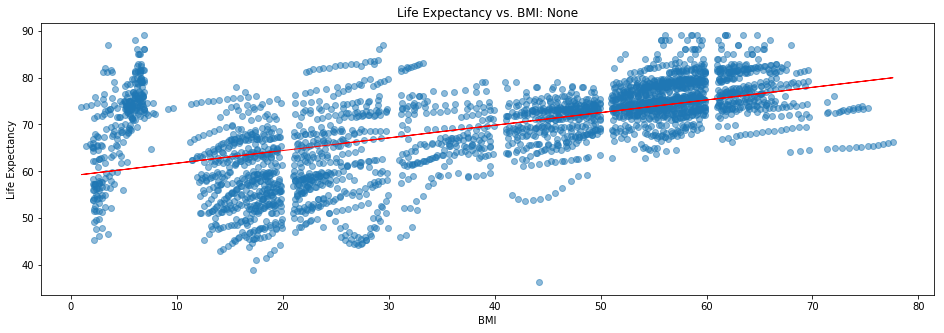

In [55]:
LE_univariate_model(data,['BMI'])

In [87]:
LE_multivariate_model(data,['Year','Adult_Mortality','BMI'])

NameError: name 'data' is not defined

No country was passed
Features: Adult_Mortality
X-Shape: (2896, 1), Y-Shape: (2896, 1)
R-Square: 0.4808188489649122
y = [[-0.0531053]] * x + [ 78.02677385]


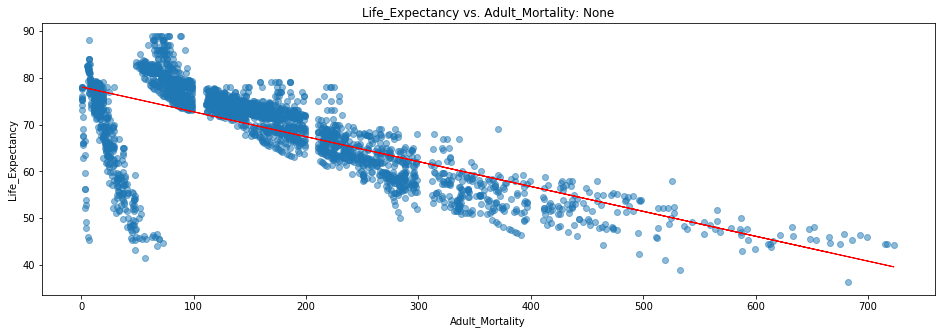

In [30]:
create_model(data,['Adult_Mortality'],['Life_Expectancy'])

No country was passed
Features: Year
X-Shape: (2896, 1), Y-Shape: (2896, 1)
R-Square: 0.029070328186019845
y = [[ 0.35086773]] * x + [-635.01634303]
No country was passed
Features: Year
X-Shape: (2896, 1), Y-Shape: (2896, 1)
R-Square: 0.006462319346761114
y = [[-2.1600585]] * x + [ 4499.69381703]
No country was passed
Features: Year
X-Shape: (2896, 1), Y-Shape: (2896, 1)
R-Square: 0.001325769388698106
y = [[-0.93770718]] * x + [ 1912.68024862]
No country was passed
Features: Year
X-Shape: (2896, 1), Y-Shape: (2896, 1)
No country was passed
Features: Year
X-Shape: (2896, 1), Y-Shape: (2896, 1)
R-Square: 0.0010724073678871626
y = [[ 14.20950373]] * x + [-27777.66251518]
No country was passed
Features: Year
X-Shape: (2896, 1), Y-Shape: (2896, 1)
No country was passed
Features: Year
X-Shape: (2896, 1), Y-Shape: (2896, 1)
R-Square: 0.006775850442912623
y = [[-206.13932402]] * x + [ 416260.46022912]
No country was passed
Features: Year
X-Shape: (2896, 1), Y-Shape: (2896, 1)
R-Square: 0.01095

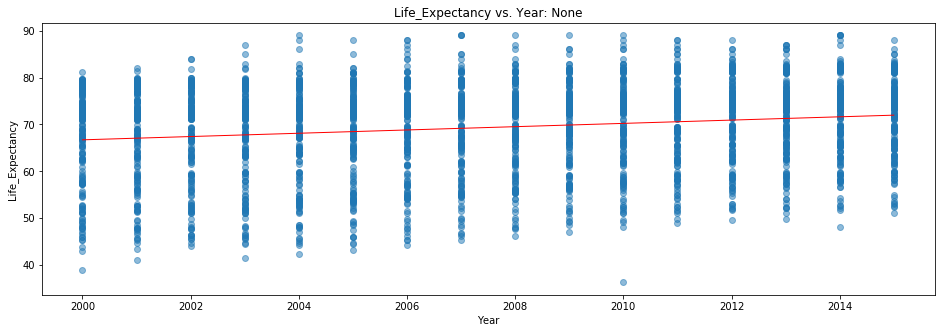

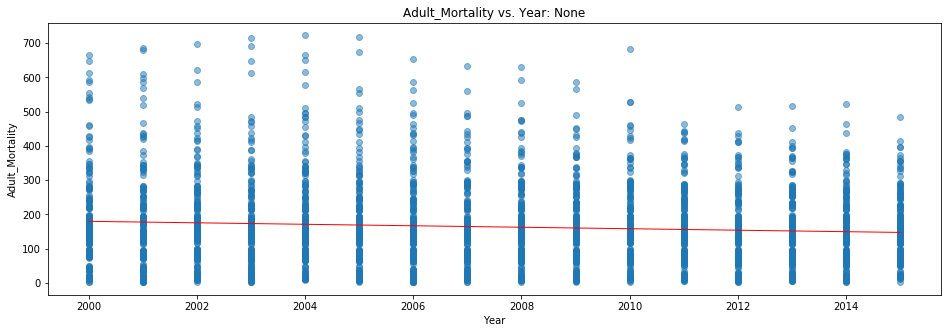

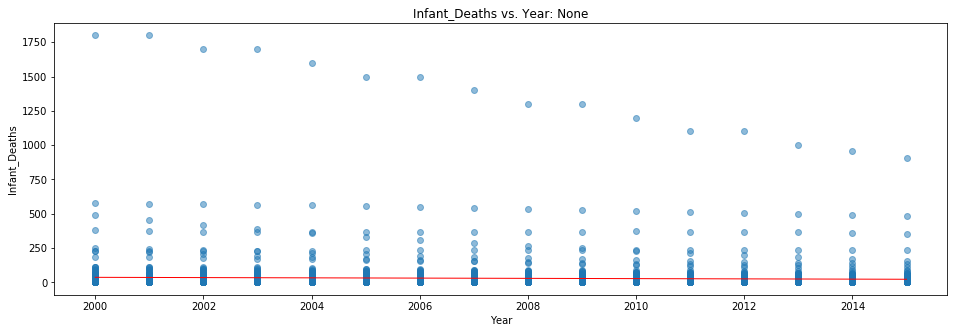

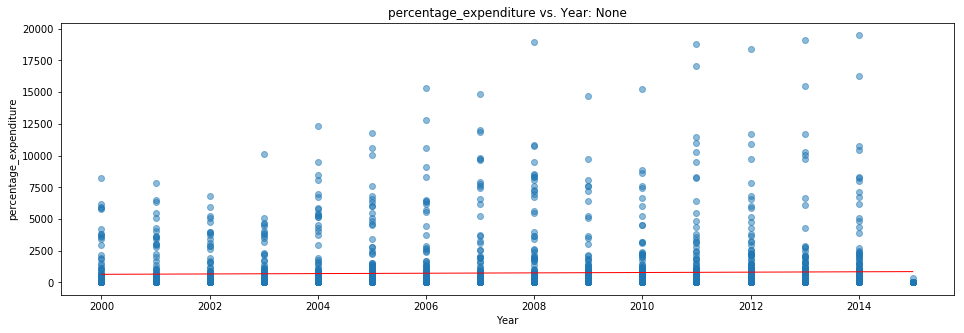

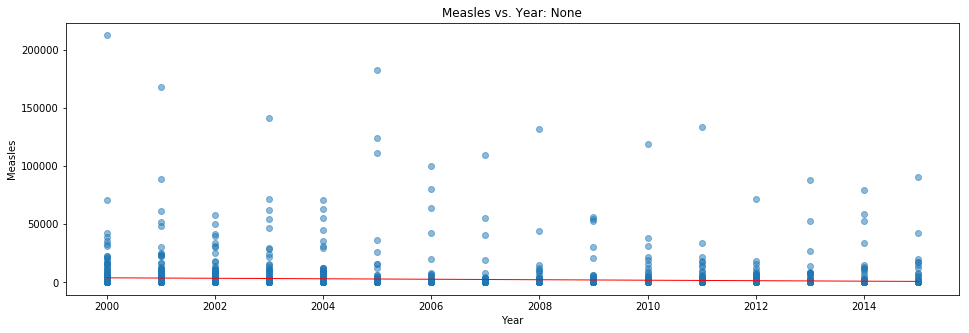

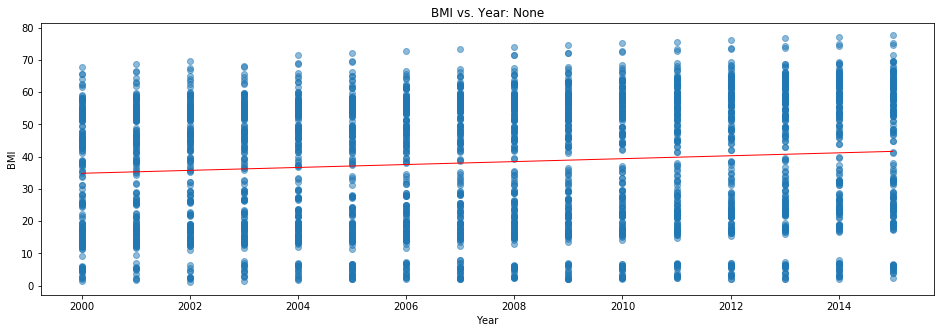

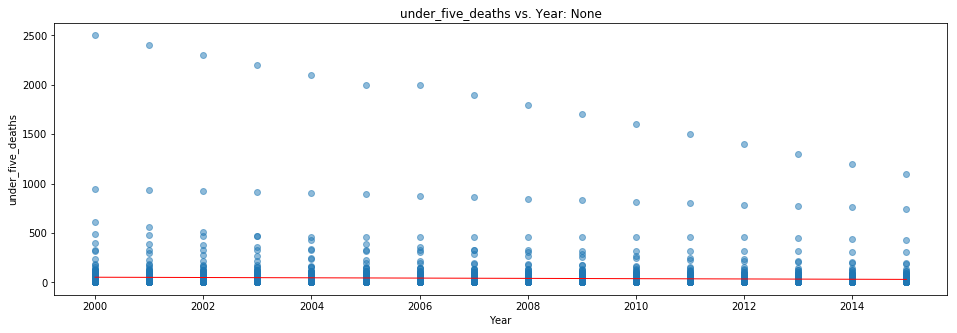

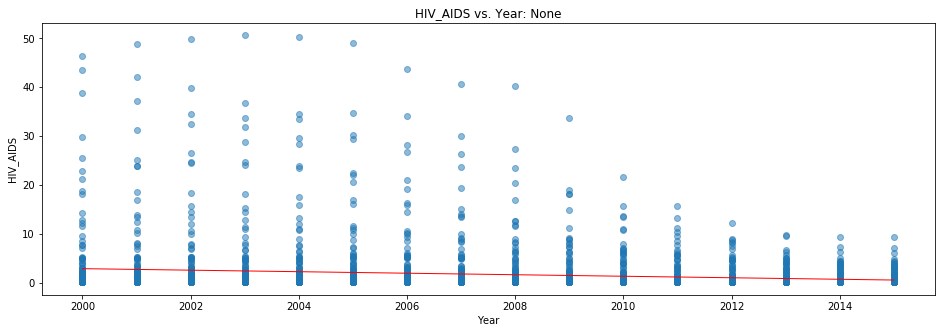

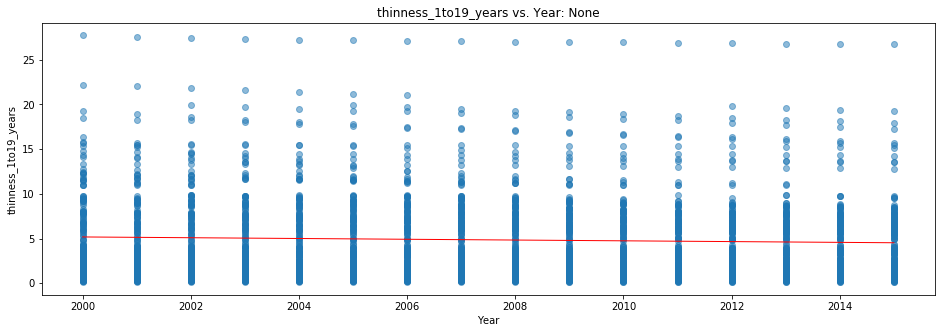

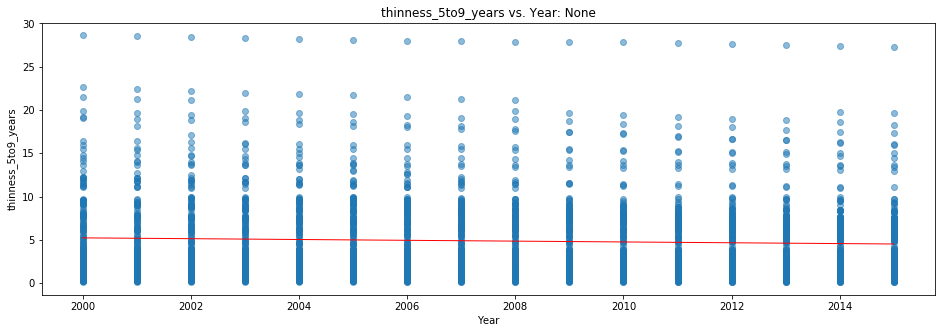

In [88]:
for col_head in data.drop('Status',axis=1).columns[3:]:
    DV = 'Year'
    try:
        create_model(data, [DV], col_head)
    except:
        scrubbed = data[[DV,col_head]].dropna(how='any')

No country was passed
Features: Year
X-Shape: (2896, 1), Y-Shape: (2896, 1)
R-Square: 0.029070328186019845
y = [[ 0.35086773]] * x + [-635.01634303]
No country was passed
Features: Year
X-Shape: (2896, 1), Y-Shape: (2896, 1)
R-Square: 0.006462319346761114
y = [[-2.1600585]] * x + [ 4499.69381703]
No country was passed
Features: Year
X-Shape: (2896, 1), Y-Shape: (2896, 1)
R-Square: 0.010955298458052765
y = [[ 0.45311586]] * x + [-871.39469451]
No country was passed
Features: Life_Expectancy
X-Shape: (2896, 1), Y-Shape: (2896, 1)
R-Square: 1.0
y = [[ 1.]] * x + [  7.10542736e-14]
No country was passed
Features: Life_Expectancy
X-Shape: (2896, 1), Y-Shape: (2896, 1)
R-Square: 0.48081884896491217
y = [[-9.05406462]] * x + [ 791.28138984]
No country was passed
Features: Life_Expectancy
X-Shape: (2896, 1), Y-Shape: (2896, 1)
R-Square: 0.32227596392534663
y = [[ 1.19424287]] * x + [-44.58609161]
No country was passed
Features: Adult_Mortality
X-Shape: (2896, 1), Y-Shape: (2896, 1)
R-Square: 0

/Users/bennyfish/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


No country was passed
Features: Measles
X-Shape: (2896, 1), Y-Shape: (2896, 1)
R-Square: 0.025743247128127367
y = [[-0.00013185]] * x + [ 69.67177084]
No country was passed
Features: Measles
X-Shape: (2896, 1), Y-Shape: (2896, 1)
R-Square: 0.0010589963245842826
y = [[ 0.00034917]] * x + [ 162.52587914]
No country was passed
Features: Measles
X-Shape: (2896, 1), Y-Shape: (2896, 1)
R-Square: 0.031000187922280986
y = [[-0.00030437]] * x + [ 38.97676563]
No country was passed
Features: BMI
X-Shape: (2896, 1), Y-Shape: (2896, 1)
R-Square: 0.32227596392534674
y = [[ 0.26985798]] * x + [ 59.03249559]
No country was passed
Features: BMI
X-Shape: (2896, 1), Y-Shape: (2896, 1)
R-Square: 0.14978199088811361
y = [[-2.40217116]] * x + [ 255.224341]
No country was passed
Features: BMI
X-Shape: (2896, 1), Y-Shape: (2896, 1)
R-Square: 1.0
y = [[ 1.]] * x + [ -4.26325641e-14]
No country was passed
Features: under_five_deaths
X-Shape: (2896, 1), Y-Shape: (2896, 1)
R-Square: 0.04976100174789799
y = [[-0.

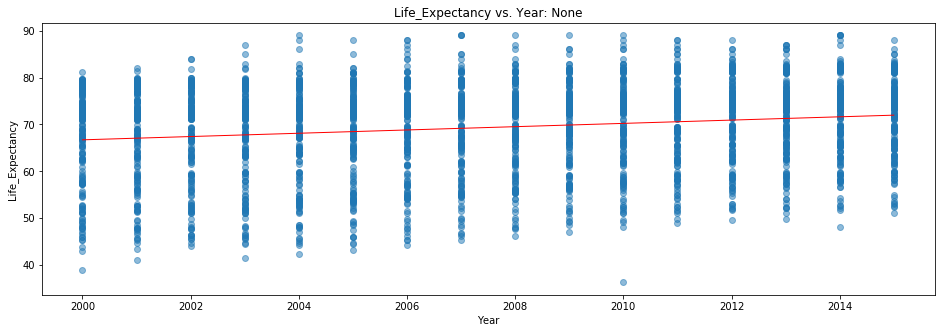

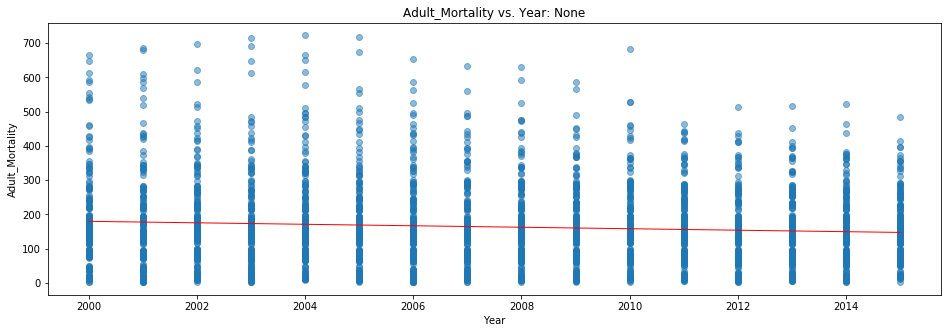

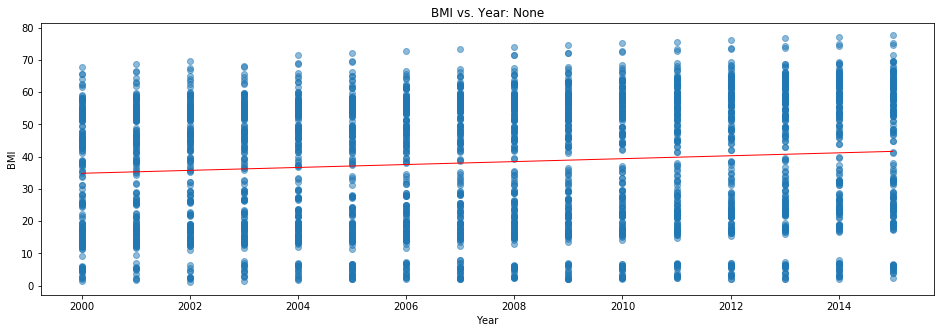

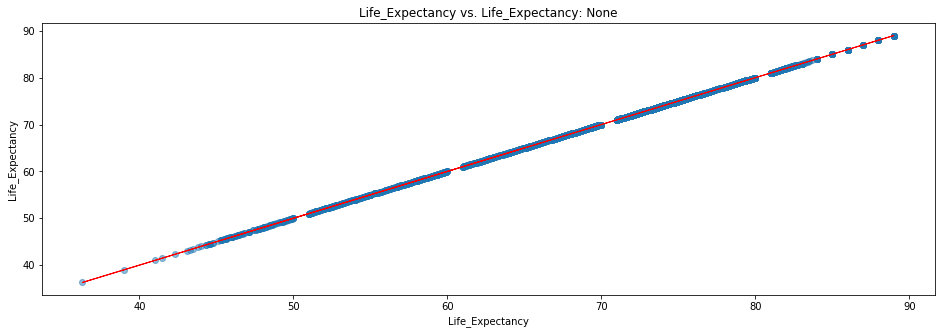

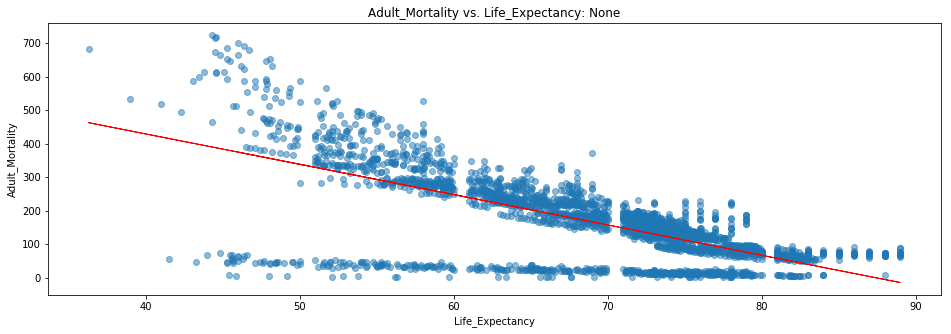

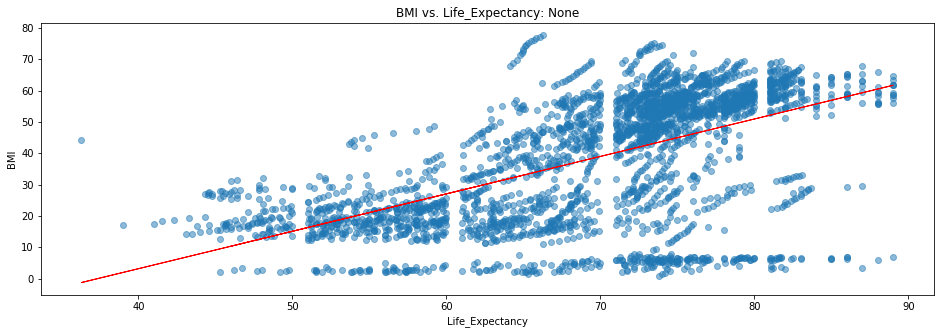

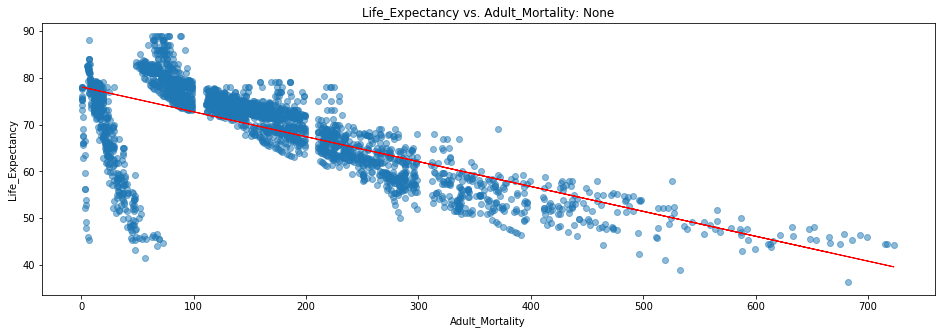

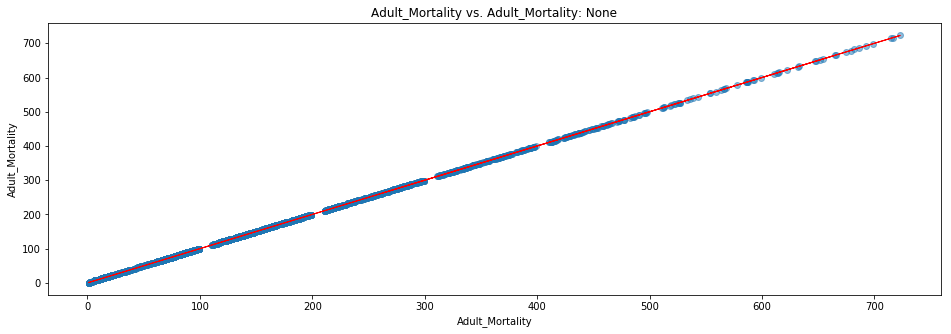

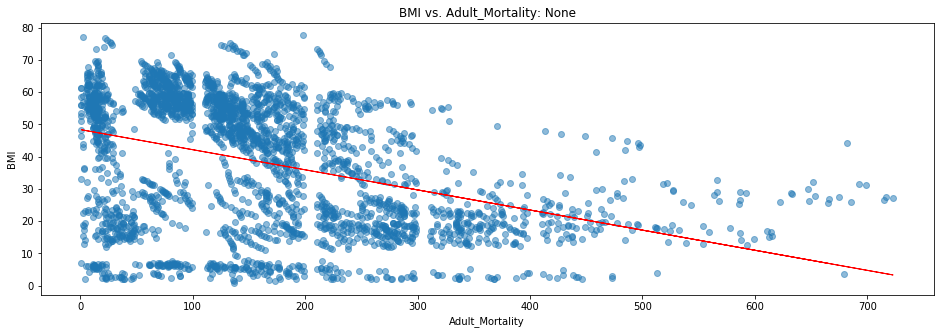

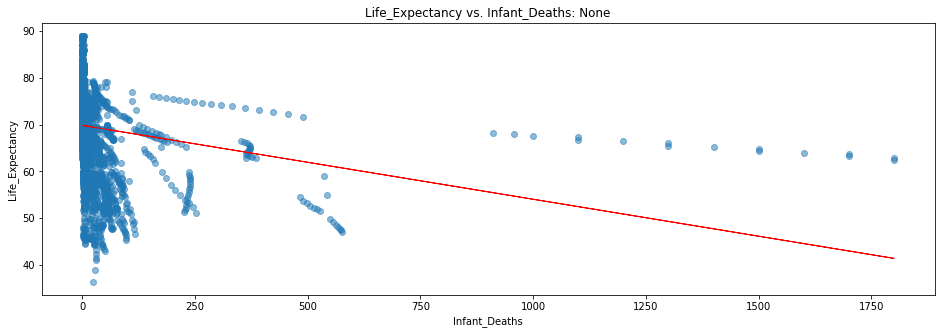

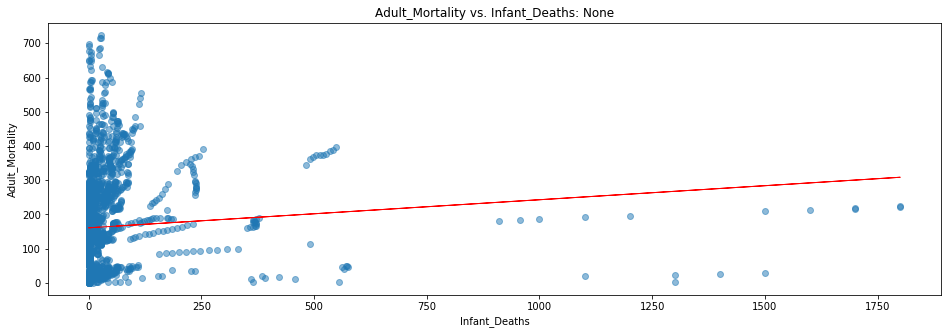

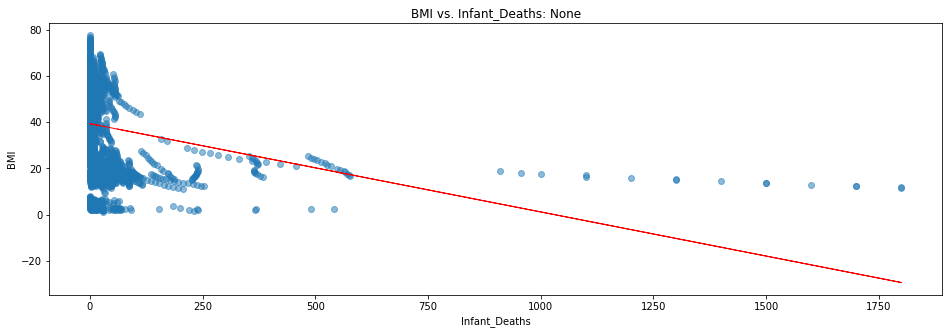

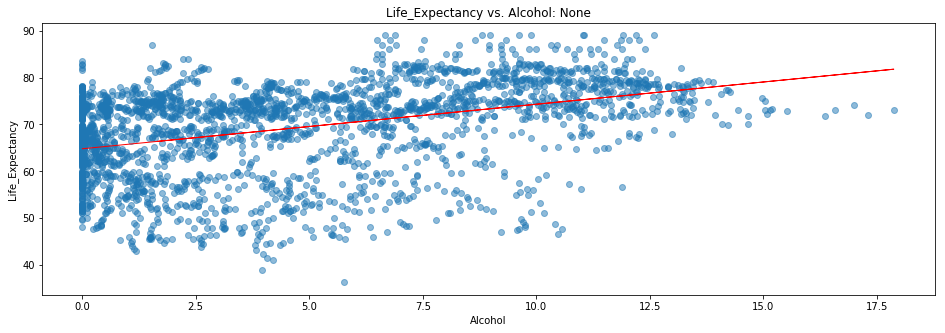

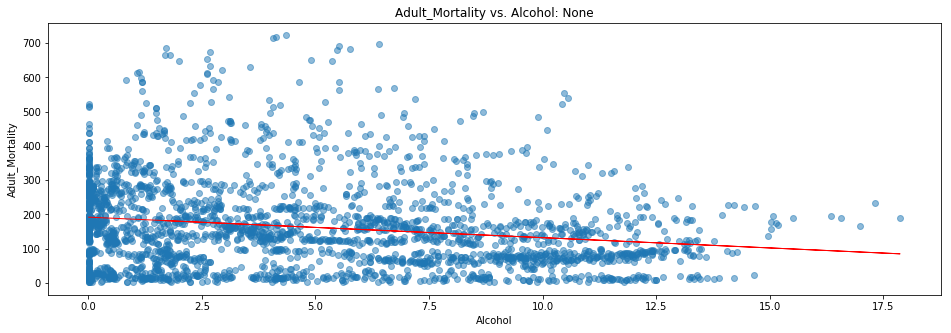

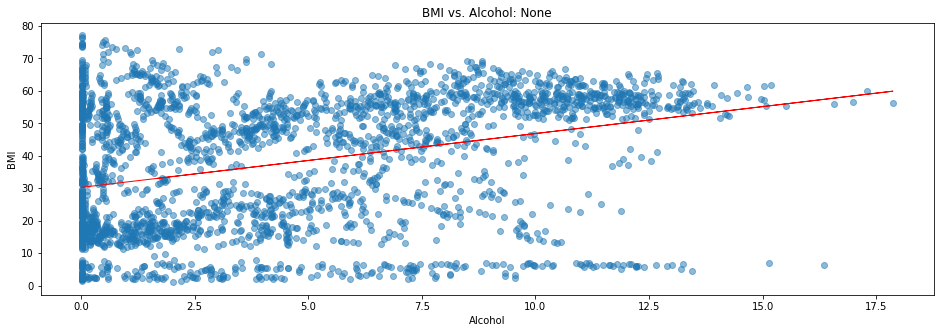

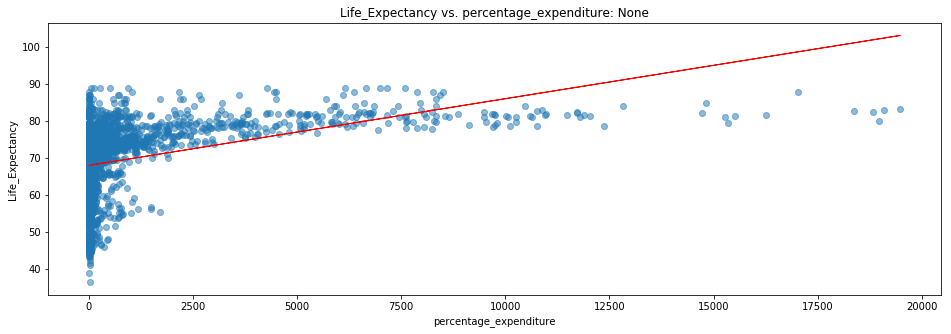

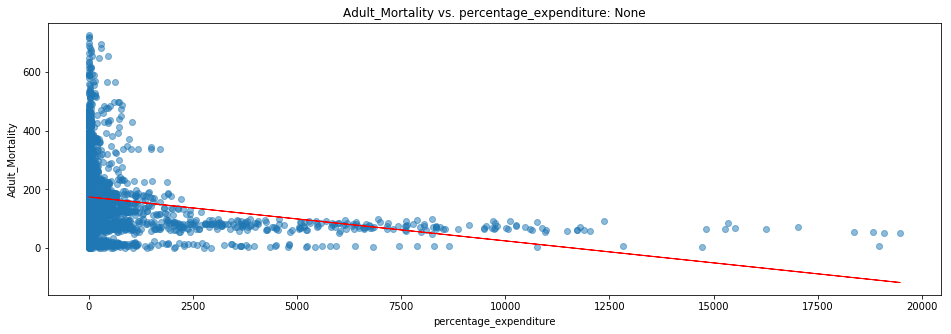

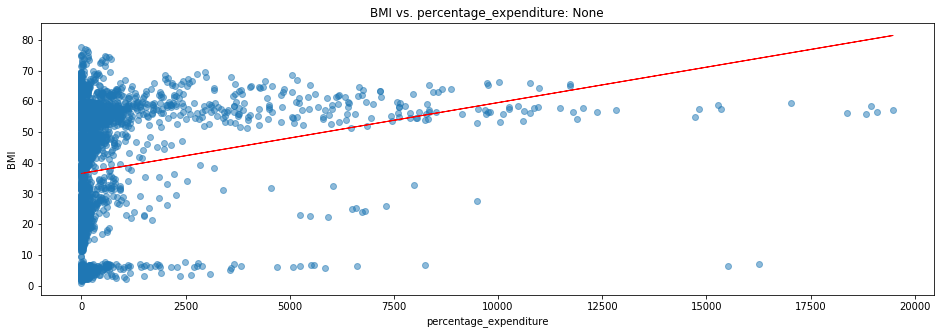

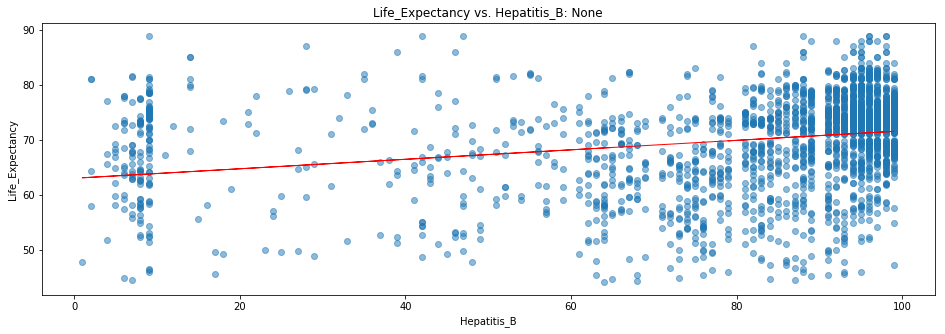

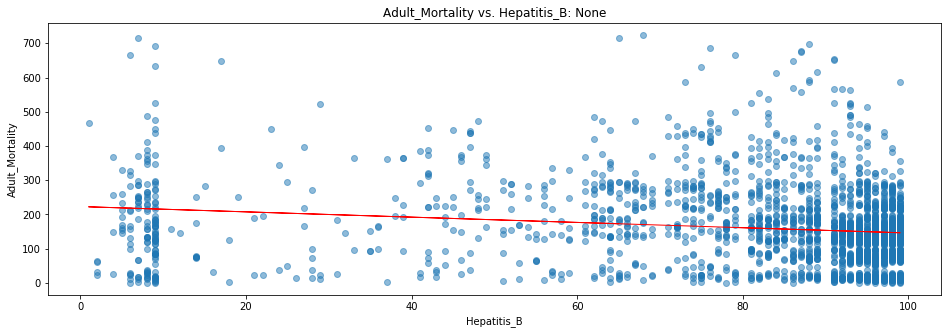

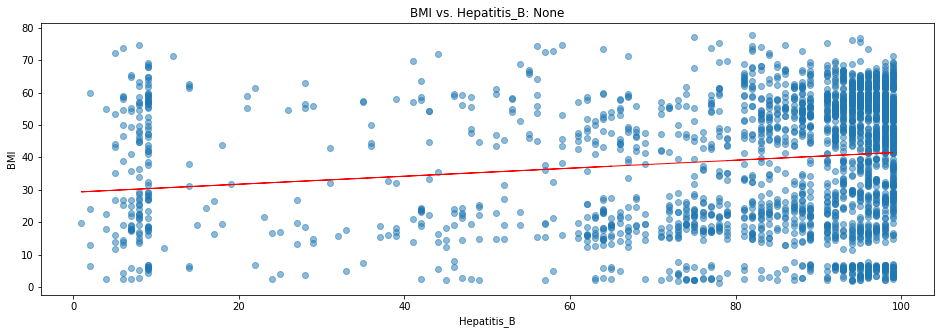

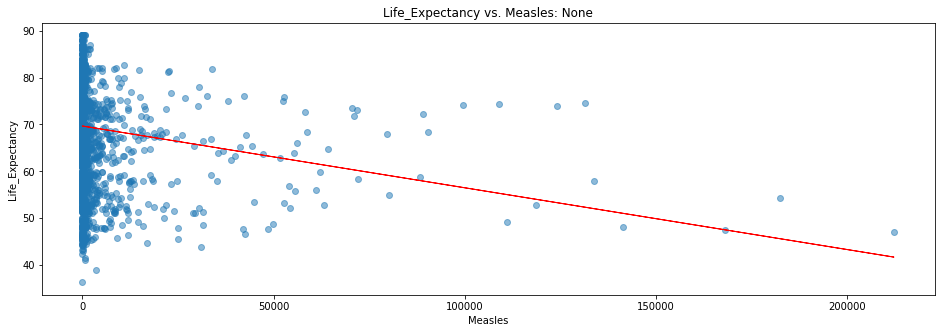

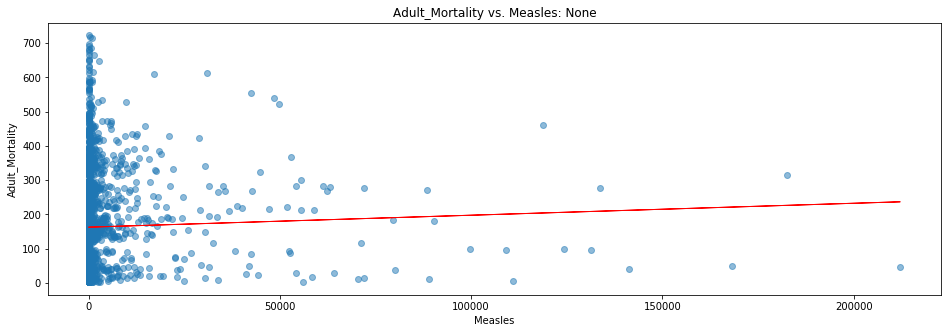

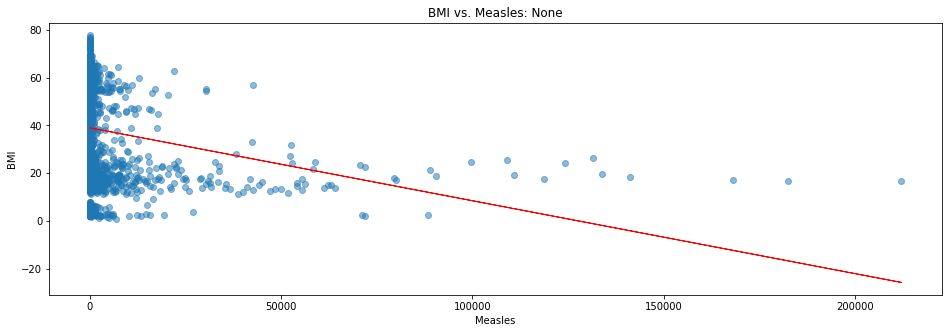

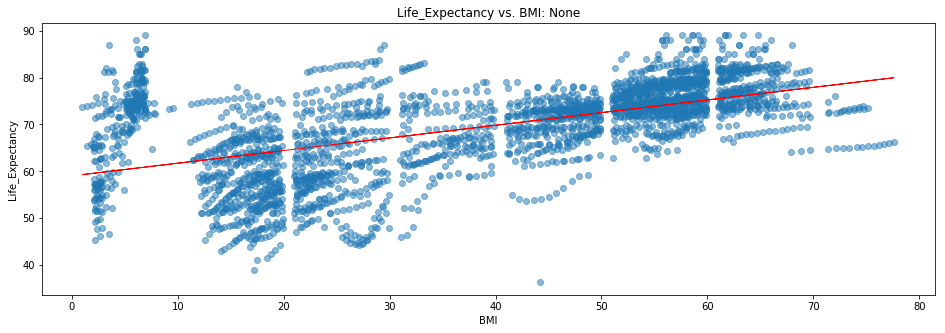

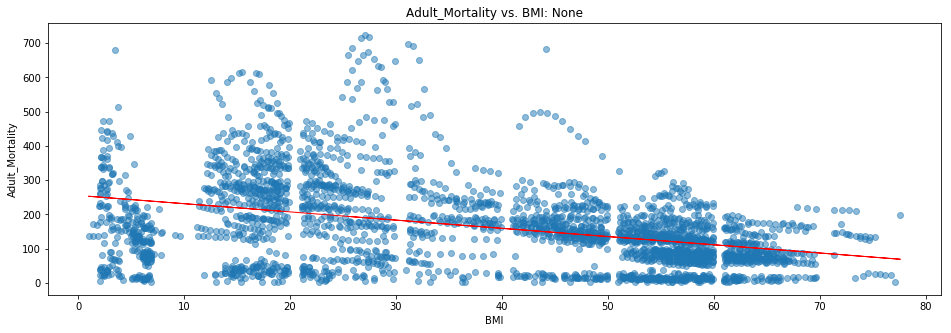

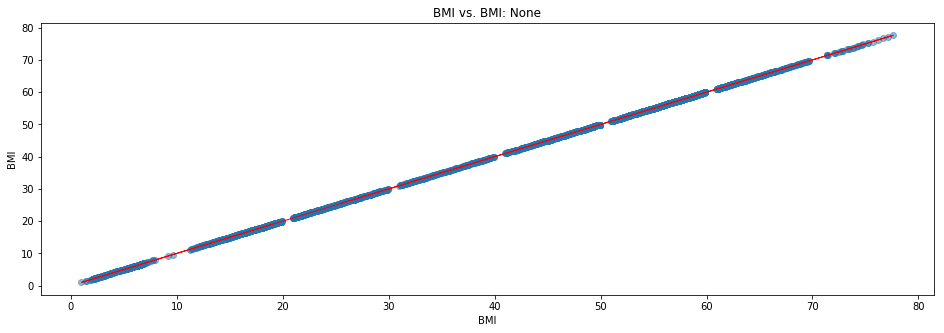

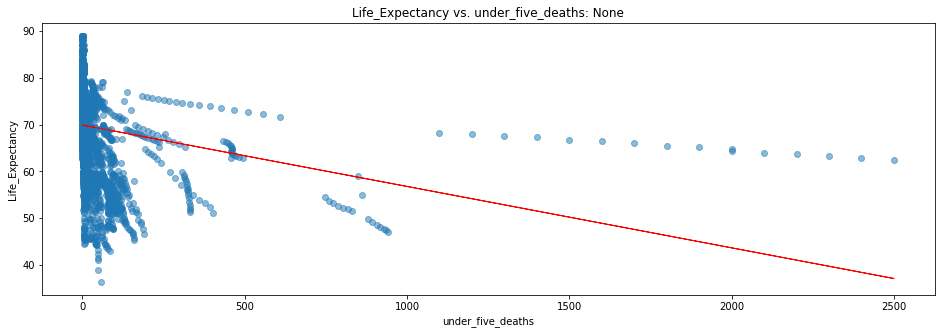

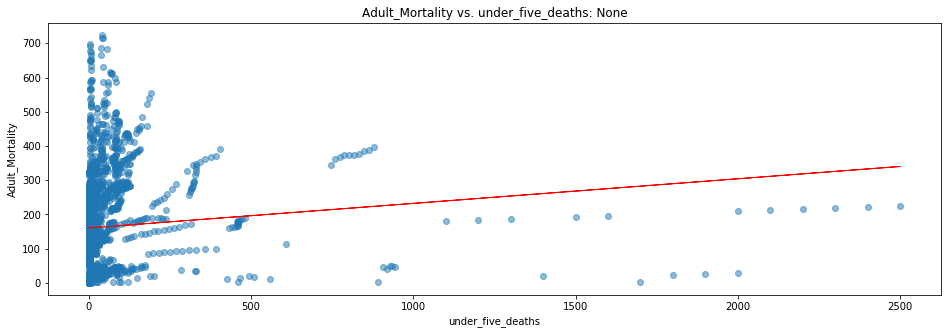

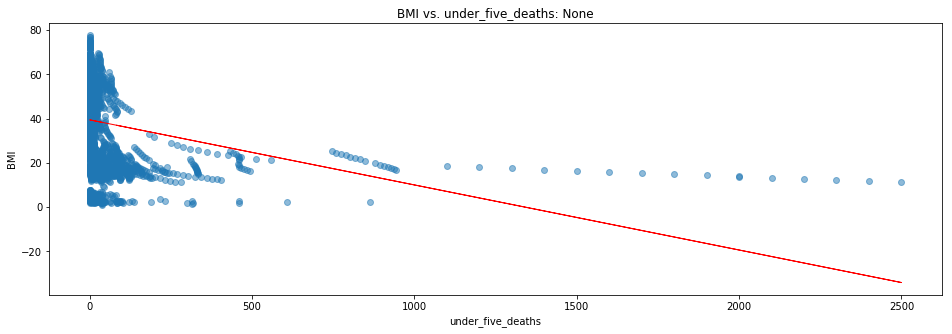

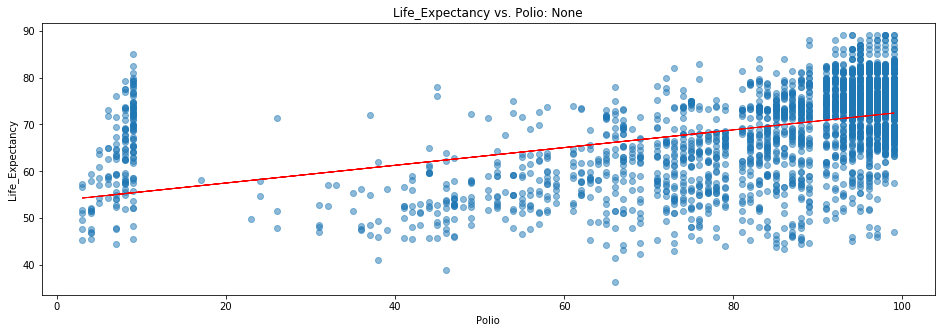

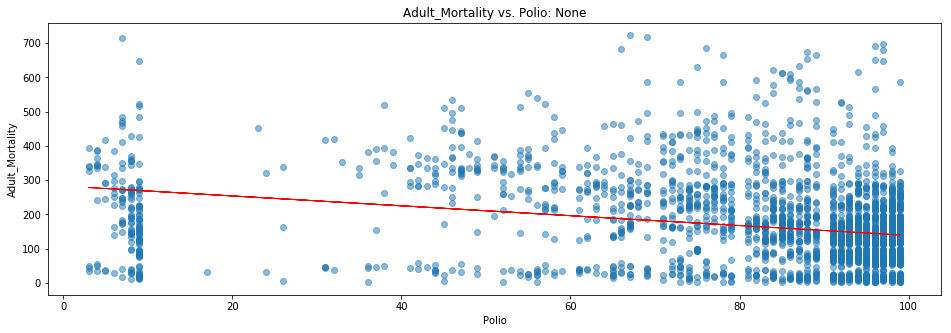

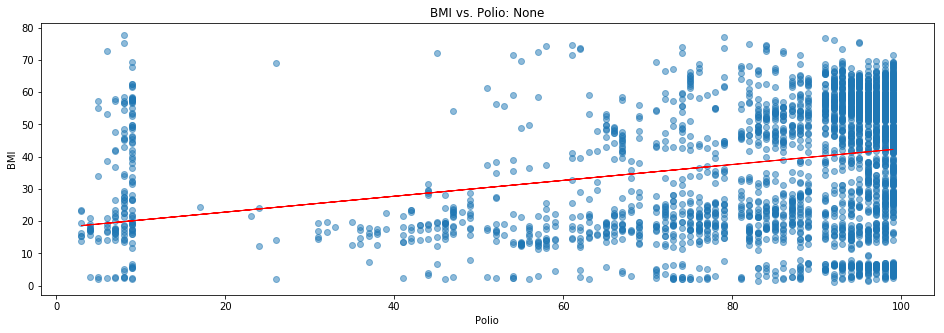

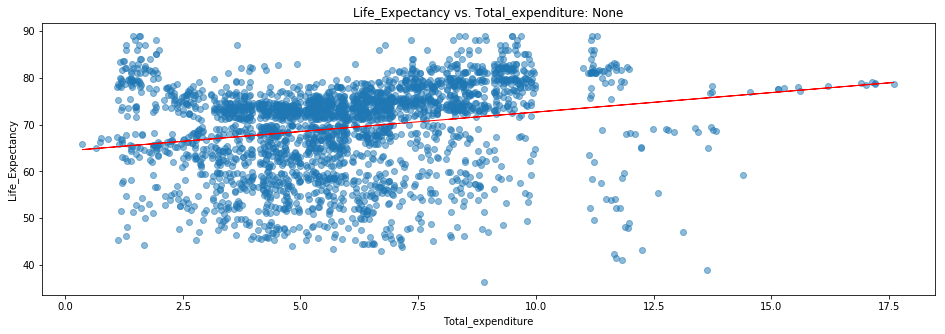

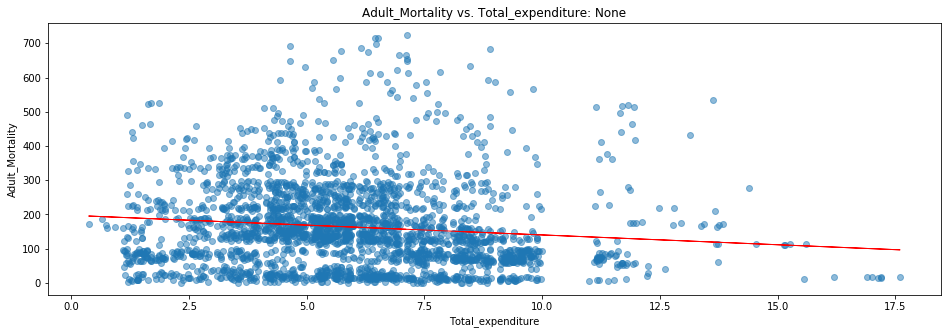

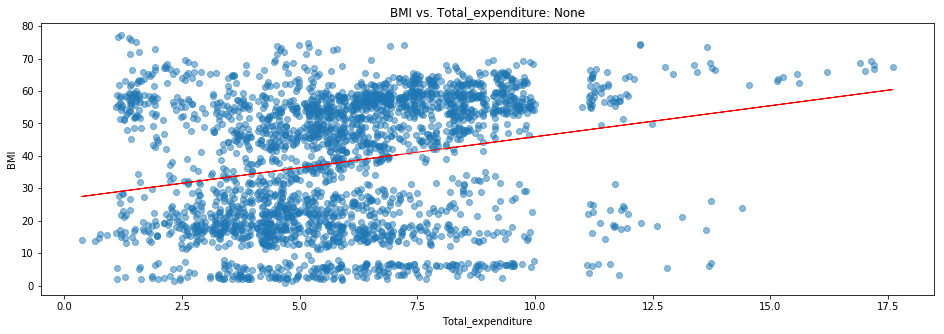

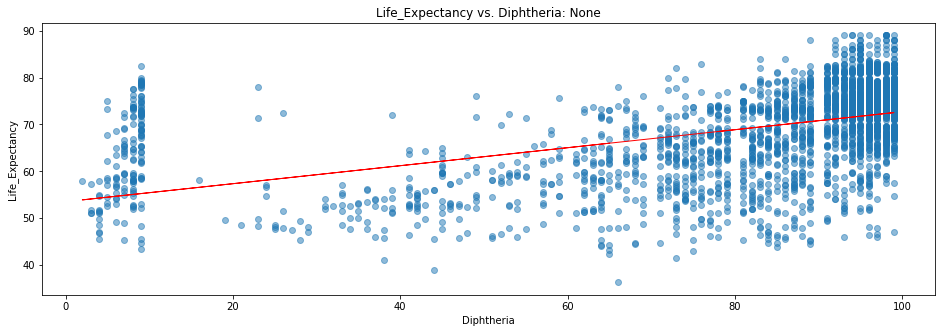

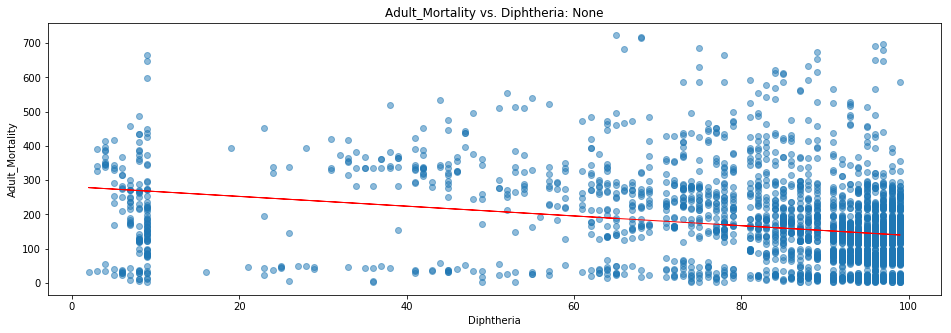

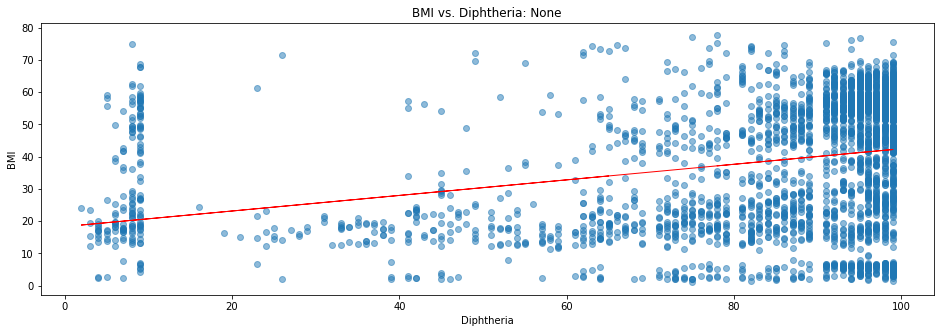

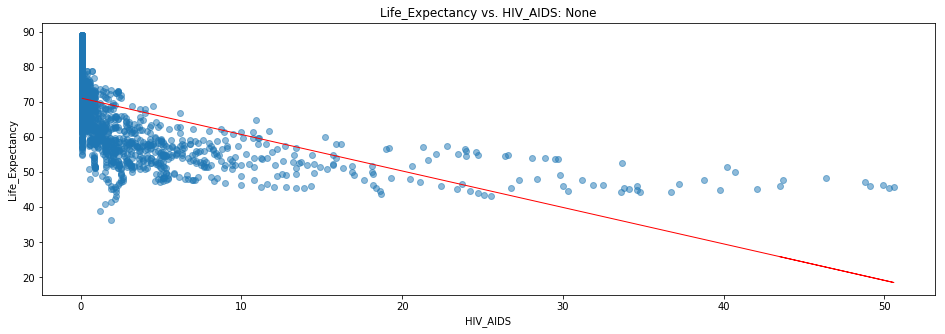

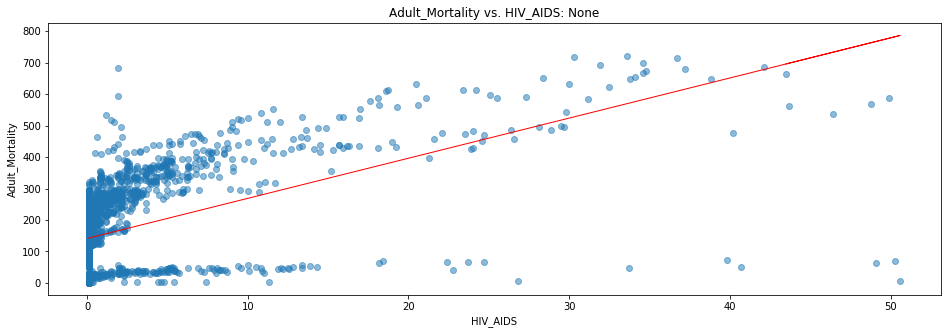

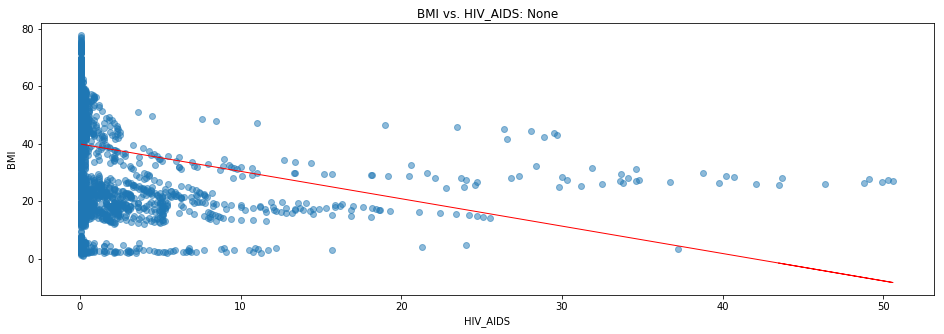

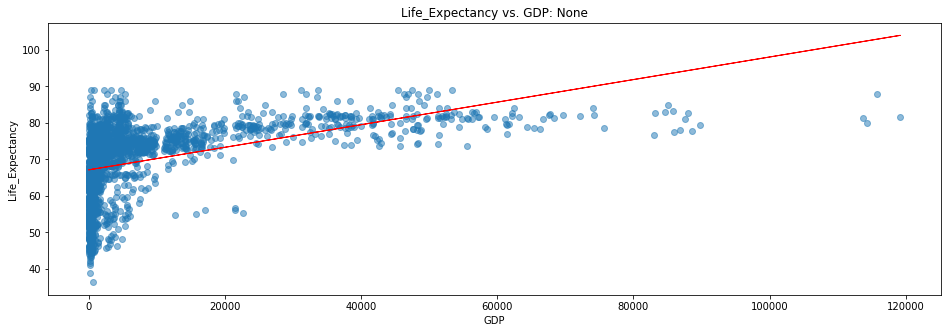

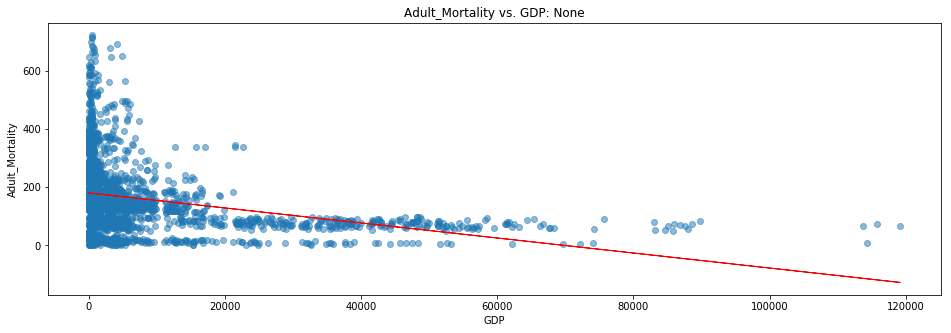

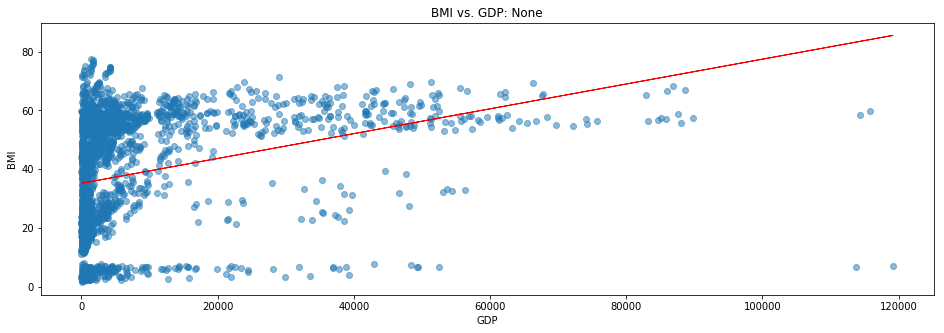

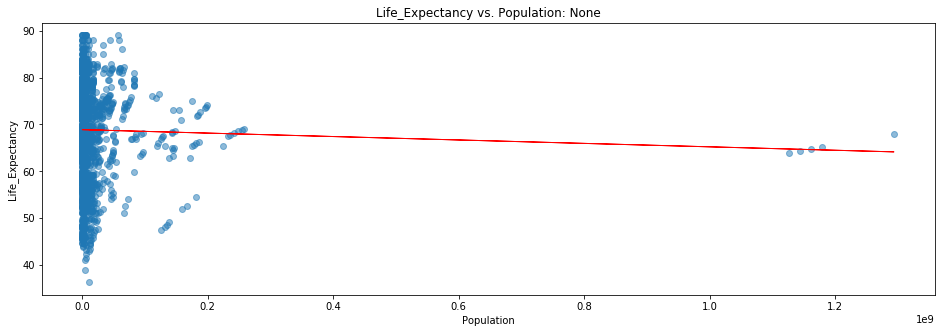

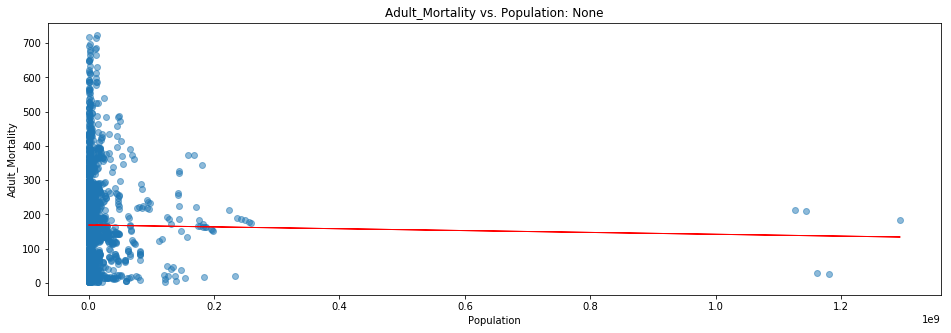

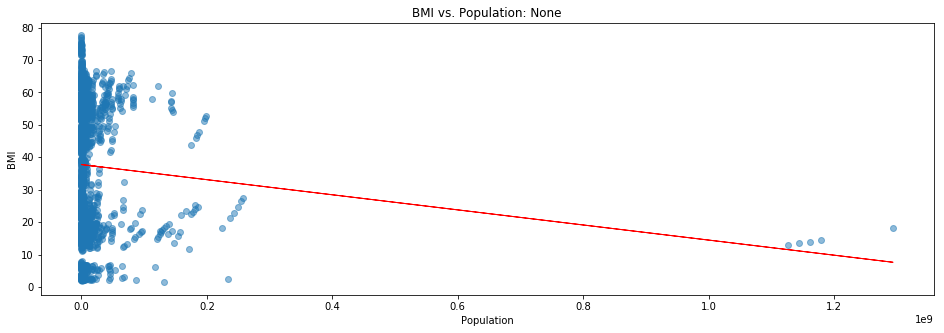

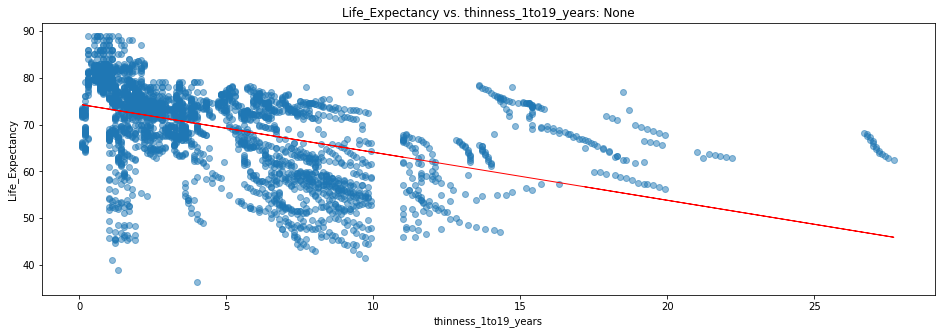

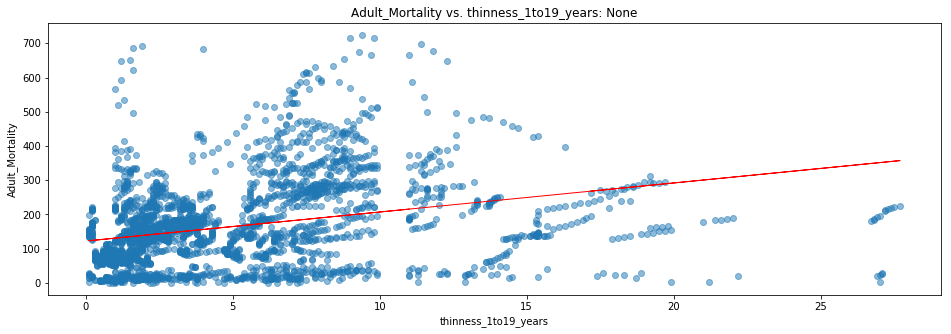

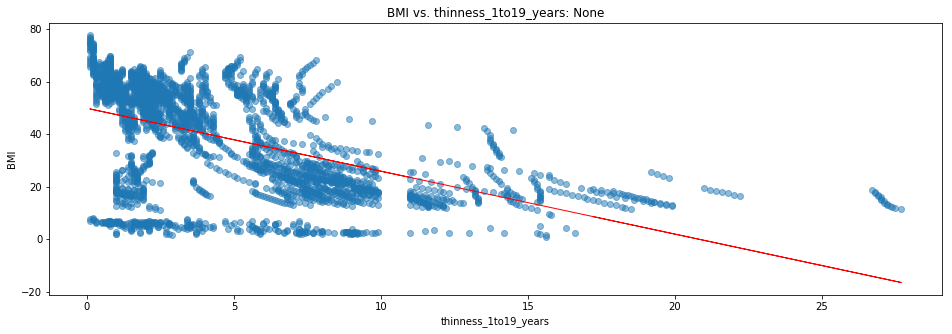

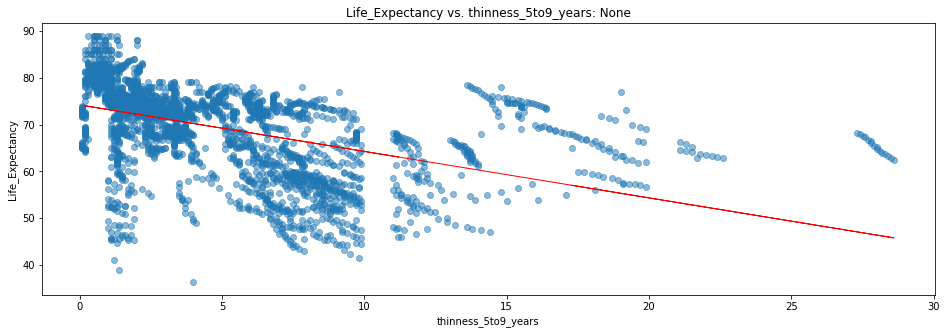

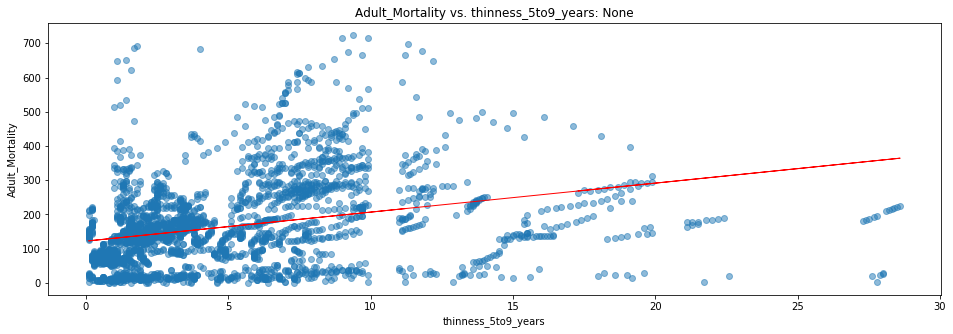

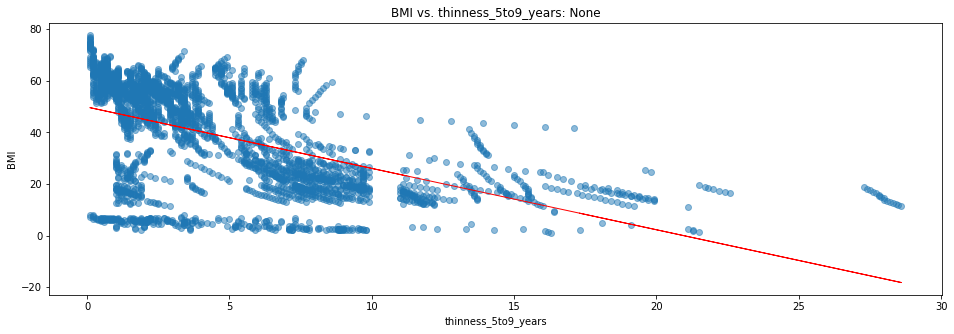

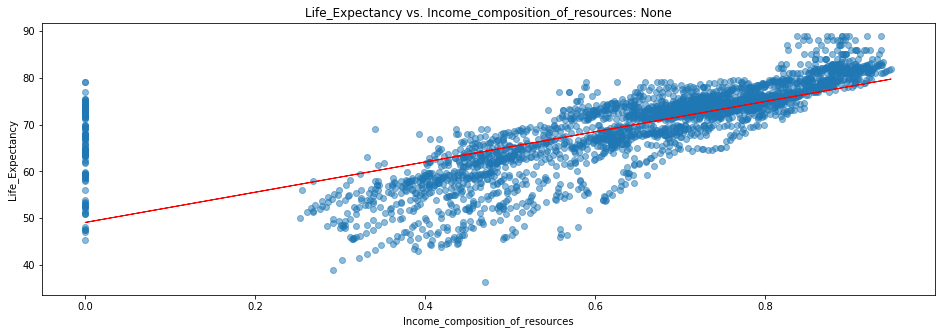

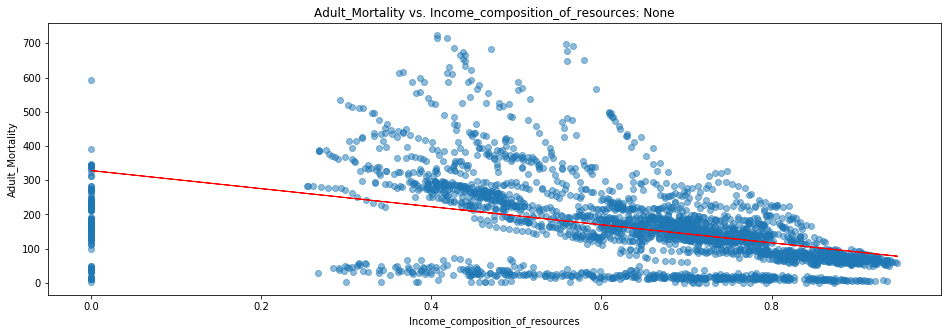

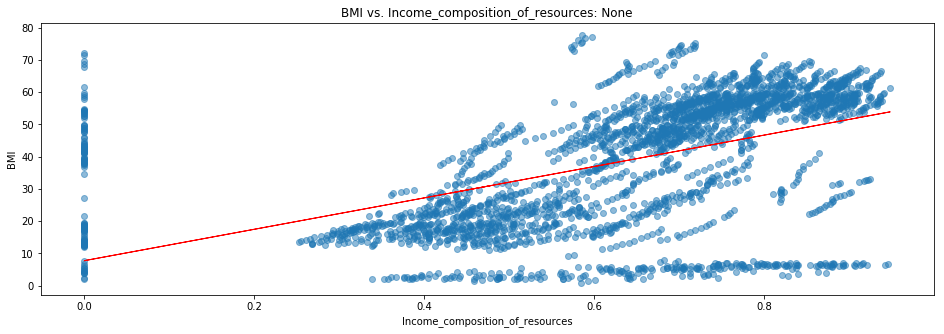

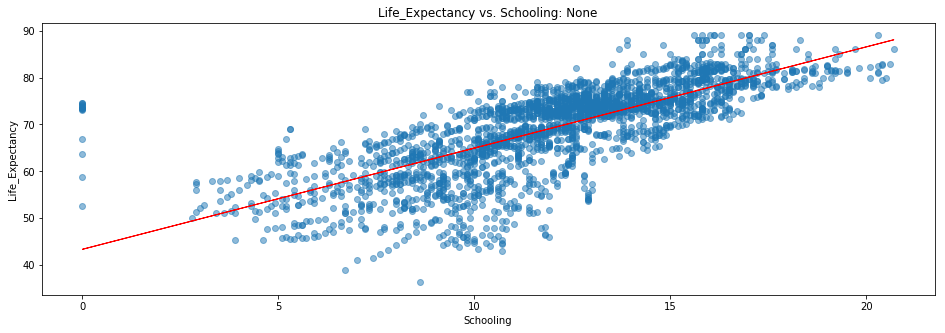

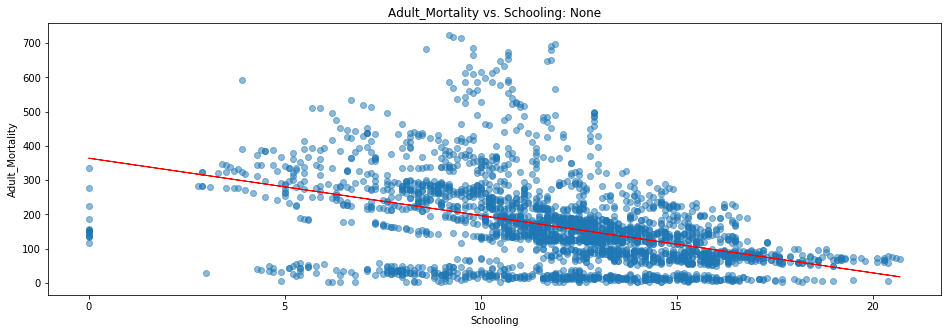

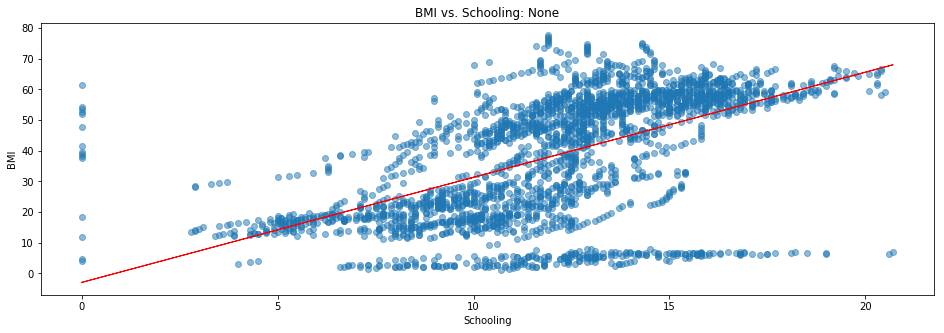

In [102]:
col_heads = ['Life_Expectancy','Adult_Mortality', 'BMI']
for feature in data.drop('Status',axis=1).columns[2:]:
    for col_head in col_heads:
        try:
            create_model(data, [feature], col_head)
        except:
            scrubbed = data[[feature,col_head]].dropna(how='any')
            try:
                create_model(scrubbed, [feature], col_head)
            except:
                continue

No country was passed
Features: Year
X-Shape: (2896, 1), Y-Shape: (2896, 1)
y = [ 0.35086773] * x + -635.0163430289249
r2: 0.029070328186019845
mse: 87.37428264658975
rmse: 9.347421176270476


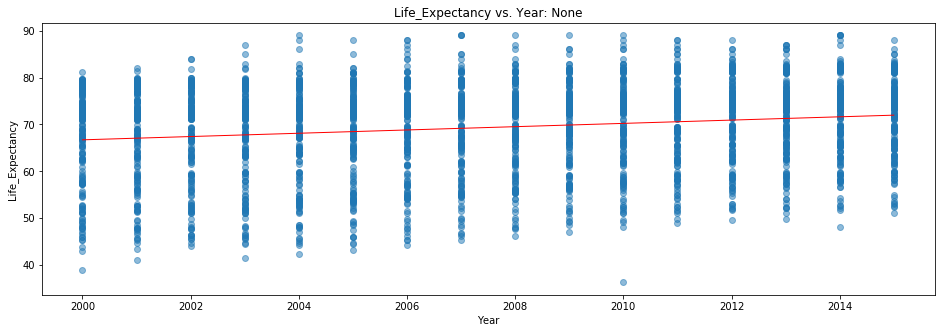

In [15]:
create_model(data,['Year'],['Life_Expectancy'])

Life_Expectancy: y = [ 0.35086773] * x + -635.0163430289249
Adult_Mortality: y = [-2.1600585] * x + 4499.693817029571
BMI: y = [ 0.45311586] * x + -871.3946945076376


In [ ]:
year = [i for i in range(2017,2501,1)]
le = [0.2713566 * x - 464.42092776 for i in year]
d = {'Year':year,
    'Life_Expectancy':le}
d2 = pd.DataFrame(d)

In [4]:
# Create future values based on regression line of Life Expectancy, Adult Mortality, and BMI VS time.
# Arbitrarily incorporated +-5% variance to le, am, and bmi to add randomization to the set.
year = [i for i in range(2016,2500,1)]
le = [(0.35086773*i-635.0163430289249)*np.random([-0.05,0.05],1) for i in year]
am = [-2.1600585*i+4499.693817029571 for i in year]
bmi = [0.45311586*i-871.3946945076376 for i in year]
d = {'Year':year,
    'Life_Expectancy':le,
    'Adult_Mortality':am,
    'BMI':bmi}
d2 = pd.DataFrame(d)

TypeError: 'module' object is not callable

In [34]:
pred = data.append(d2)
pred.to_csv('pred.csv')

No country was passed
Features: Year
X-Shape: (2980, 1), Y-Shape: (2980, 1)
y = [ 0.35086777] * x + -635.0164341465459
r2: 0.1328912902071655
mse: 84.91138340420275
rmse: 9.214737294367255


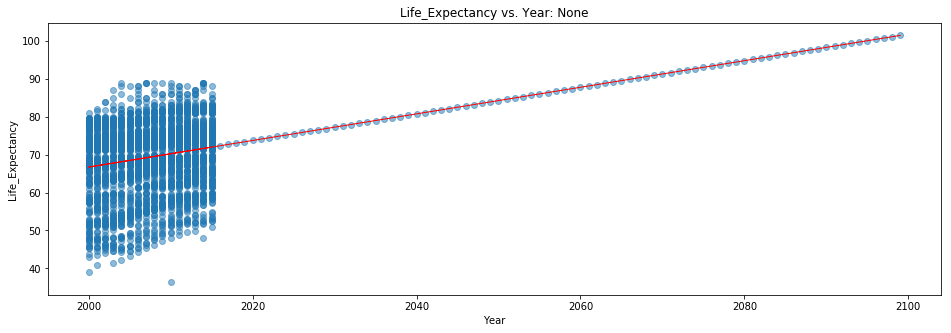

In [33]:
create_model(pred,['Year'],['Life_Expectancy'])

Features: ['Year', 'Adult_Mortality', 'BMI']
X-Shape: (2980, 3), Y-Shape: (2980, 1)
y = [[ 0.18524157 -0.04234676  0.16365509]] * x + [-301.86077864]
r2: 0.6375937669291498
mse: 35.48853131887444
rmse: 5.957225135822419


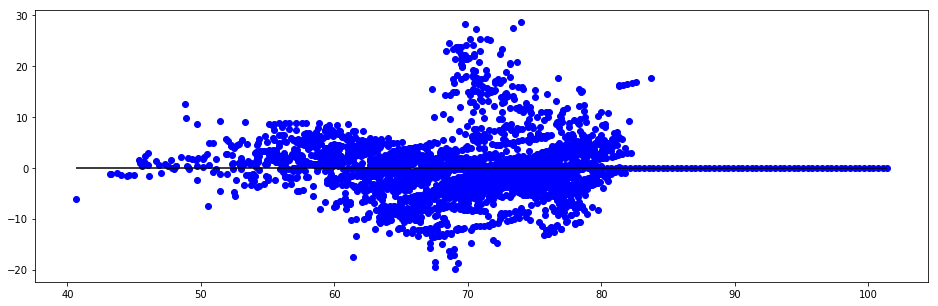

In [38]:
LE_multivariate_model(pred,['Year','Adult_Mortality','BMI'])

In [16]:
0.35086777/0.35086773-1

1.1400307475817328e-07

In [26]:
def LE_multivariate_overlay(data, features):
    '''
    Works by passing in multiple features into the model which spits out a prediction 
    line on top of Life Expectancy vs Year scatterplot. 'features' must be all be the same length.
    
    '''
    df = data
    
#     if country == None:
#         print("No country was passed")
#     else:
#         df = df.loc[df.Country == country]
#         print(country)
    
    print(f'Features: {features}')
    X = df[features]
    y = df['Life_Expectancy'].values.reshape(-1,1)
    print(f'X-Shape: {X.shape}, Y-Shape: {y.shape}')
    
    
    # Initiate the model
    model = LinearRegression()
    model.fit(X,y)
    predictions = model.predict(X)
    print(f'y = {model.coef_} * x + {model.intercept_}')
    print(f'r2: {model.score(X,y)}')
    print(f'mse: {mean_squared_error(y, predictions)}')
    print(f'rmse: {sqrt(mean_squared_error(y, predictions))}')
    
    # create line
#     x_min = np.array([X.min()])
#     x_max = np.array([X.max()])
#     print(f"Min X Value: {x_min}")
#     print(f"Max X Value: {x_max}")   
#     plt.figure(figsize = (16,5))
    plt.scatter(df.Year, y, c='blue')
    plt.plot(df.Year, predictions, color='red', linewidth=1)
    
    plt.show()
    print(f'mse: {mean_squared_error(y, predictions)}')
    print(f'rmse: {sqrt(mean_squared_error(y, predictions))}')

Features: ['Year', 'Adult_Mortality', 'BMI']
X-Shape: (2980, 3), Y-Shape: (2980, 1)
y = [[ 0.18524157 -0.04234676  0.16365509]] * x + [-301.86077864]
r2: 0.6375937669291499
mse: 35.488531318874436
rmse: 5.957225135822418


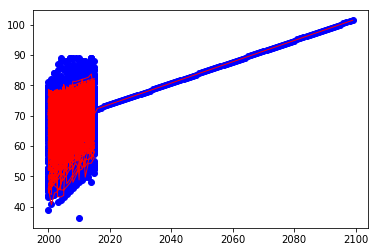

mse: 35.488531318874436
rmse: 5.957225135822418


In [27]:
pred = pd.read_csv('pred.csv')
LE_multivariate_overlay(pred,['Year','Adult_Mortality','BMI'])